# quant-econ Solutions: The Linear State Space Model

Solutions for http://quant-econ.net/jl/linear_models.html

In [1]:
using QuantEcon
using PyPlot 

## Exercise 1

/home/chase/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


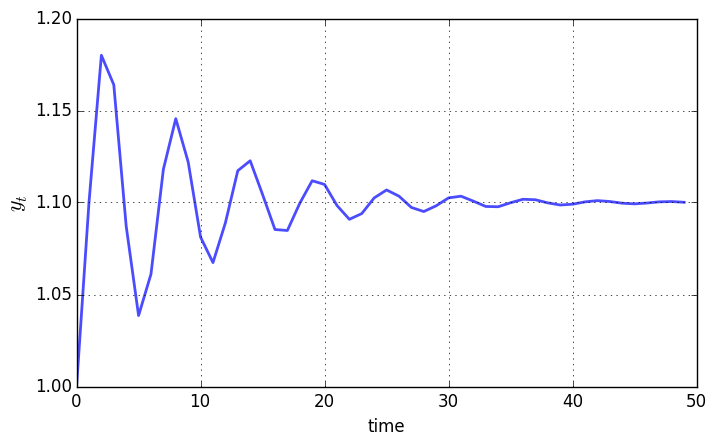

In [2]:
phi_0, phi_1, phi_2 = 1.1, 0.8, -0.8

A = [1.0   0.0   0
     phi_0 phi_1 phi_2
     0.0   1.0   0.0]
C = zeros(3, 1)
G = [0.0 1.0 0.0]
mu_0 = ones(3)

lss = LSS(A, C, G; mu_0=mu_0)

x, y = simulate(lss, 50)
fig, ax = subplots(figsize=(8, 4.6))
ax[:plot](squeeze(y, 1), "b-", lw=2, alpha=0.7)
ax[:grid]()
ax[:set_xlabel]("time")
ax[:set_ylabel](L"$y_t$", fontsize=16);

fig[:show]()

## Exercise 2

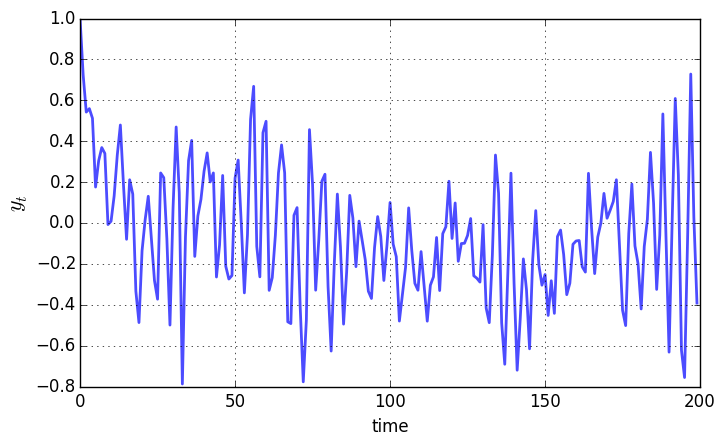

In [3]:
phi_1, phi_2, phi_3, phi_4 = 0.5, -0.2, 0, 0.5
sigma = 0.2

A = [phi_1 phi_2 phi_3 phi_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [sigma
     0.0 
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]

ar = LSS(A, C, G; mu_0=ones(4))
x, y = simulate(ar, 200)

PyPlot.close("all")
fig, ax = subplots(figsize=(8, 4.6))
ax[:plot](squeeze(y, 1), "b-", lw=2, alpha=0.7)
ax[:grid]()
ax[:set_xlabel]("time")
ax[:set_ylabel](L"$y_t$", fontsize=16);

fig[:show]()

## Exercise 3

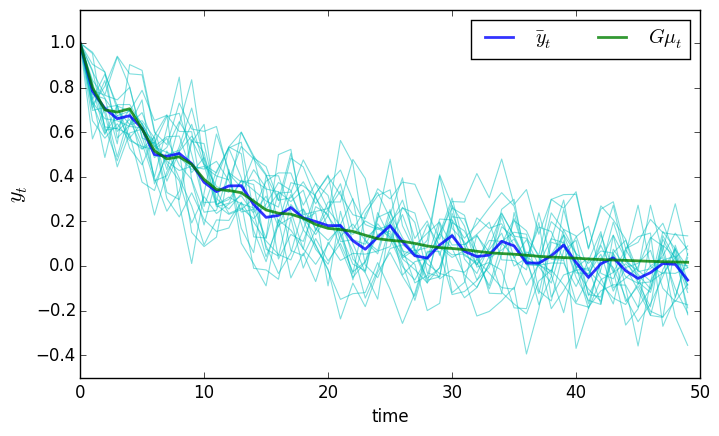

In [4]:
phi_1, phi_2, phi_3, phi_4 = 0.5, -0.2, 0, 0.5
sigma = 0.1

A = [phi_1 phi_2 phi_3 phi_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [sigma
     0.0 
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]
I = 20
T = 50
ar = LSS(A, C, G; mu_0=ones(4))
ymin, ymax = -0.5, 1.15

PyPlot.close("all")
fig, ax = subplots(figsize=(8, 4.6))
ax[:set_ylim](ymin, ymax)
ax[:set_xlabel]("time")
ax[:set_ylabel](L"$y_t$", fontsize=16)

ensemble_mean = zeros(T)
for i=1:I
    x, y = simulate(ar, T)
    y = squeeze(y, 1)
    ax[:plot](y, "c-", lw=0.8, alpha=0.5)
    ensemble_mean .+= y
end

ensemble_mean = ensemble_mean ./ I
ax[:plot](ensemble_mean, "b", lw=2, alpha=0.8, label=L"$\bar y_t$")
m = @task moment_sequence(ar)
pop_means = Float64[]
for t=1:T
    mu_x, mu_y, Sigma_x, Sigma_y = consume(m)
    push!(pop_means, mu_y[1])
end
ax[:plot](pop_means, color="g", lw=2, alpha=0.8, label=L"$G\mu_t$")
ax[:legend](ncol=2);

fig[:show]()

## Exercise 4

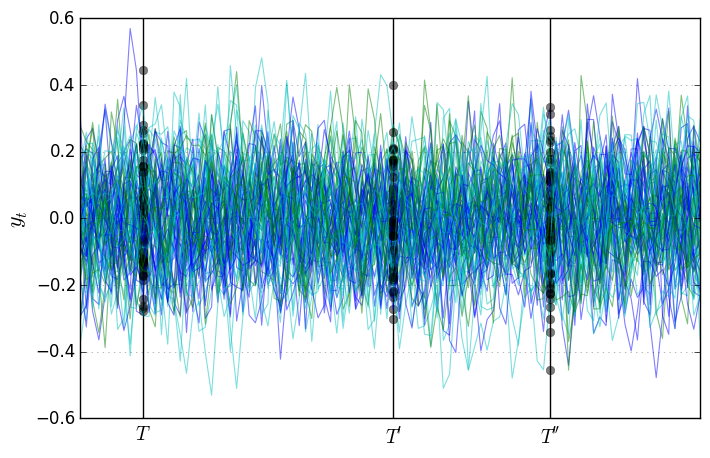

/home/chase/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [5]:
phi_1, phi_2, phi_3, phi_4 = 0.5, -0.2, 0, 0.5
sigma = 0.1

A = [phi_1 phi_2 phi_3 phi_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [sigma
     0.0 
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]

T0 = 10
T1 = 50
T2 = 75
T4 = 100

ar = LSS(A, C, G; mu_0=ones(4))
ymin, ymax = -0.6, 0.6

PyPlot.close("all")
fig, ax = subplots(figsize=(8, 5))

ax[:grid](alpha=0.4)
ax[:set_ylim](ymin, ymax)
ax[:set_ylabel](L"$y_t$", fontsize=16)
ax[:vlines]((T0, T1, T2), -1.5, 1.5)

ax[:set_xticks]((T0, T1, T2))
ax[:set_xticklabels]((L"$T$", L"$T'$", L"$T''$"), fontsize=14)

mu_x, mu_y, Sigma_x, Sigma_y = stationary_distributions(ar)
ar = LSS(A, C, G; mu_0=mu_x, Sigma_0=Sigma_x)
colors = ["c", "g", "b"]

for i=1:80
    rcolor = colors[rand(1:3)]
    x, y = simulate(ar, T4)
    y = squeeze(y, 1)
    ax[:plot](y, color=rcolor, lw=0.8, alpha=0.5)
    ax[:plot]((T0, T1, T2), (y[T0], y[T1], y[T2],), "ko", alpha=0.5);
end

fig[:show]()